<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2B%EB%94%A5%EB%9F%AC%EB%8B%9D/XGBoost_08_XGBoost_Alternative_Base_Learners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**8 XGBoost 기본 학습기**
=================

8.1 여러가지 기본 학습기
====================
기본 학습기는 XGBoost가 앙상블 모델을 만드는데 사용하는 머신러닝 모델 

8.2 gblinear 적용하기
====================
선형모델에 잘 맞는 데이터셋일 경우 사용하는 기본 학습기

> ### 선형 데이터셋에 적용하기

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor, XGBClassifier, XGBRFRegressor, XGBRFClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
X = np.arange(1, 100)
np.random.seed(2)
y = []
for i in X:
  y.append(i*np.random.uniform(-0.2, 0.2))
y = np.array(y)
X = X.reshape(X.shape[0], 1)
y = y.reshape(y.shape[0], 1)

[08:18:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


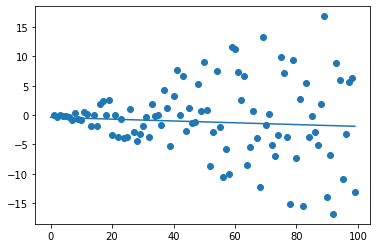

In [ ]:
import matplotlib.pyplot as plt
xgbr = XGBRegressor(booster='gblinear')
xgbr.fit(X, y)
plt.scatter(X, y)
plt.plot((0,99), (xgbr.intercept_, xgbr.coef_*99+xgbr.intercept_))
plt.show()

In [ ]:
# 각 폴드 점수의 평균을 반환하는 함수 생성
def regression_model(model):
  scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)
  rmse = (-scores)**0.5
  return rmse.mean()

In [ ]:
regression_model(XGBRegressor(booster='gblinear'))

[08:11:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


6.208537305892296

In [ ]:
regression_model(XGBRegressor(booster='gbtree'))

[08:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


7.936201694808057

In [ ]:
regression_model(LinearRegression())

6.214962315808842

> * gblinear는 강력한 옵션이지만, 선형 모델이 트리 기반 모델보다 더 높은 성능을 낼 수 있다는 확신이 있을때만 사용해야한다.

8.3 dart 비교하기
====================
dart 기본학습기는 그레이디언트 부스팅 트리모델을 사용하기 때문에 gbtree와 비슷하다  
하지만 부스팅 단계마다 트리를 삭제(drop out)하는것이 주요한 차이점이다

> ### dart를 사용한 XGBRegressor

In [ ]:
# 사이킷런에 있는 당뇨병 데이터셋 사용 
# 당뇨병환자 442명의 데이터로 구성된 회귀 데이터셋
# 특성은 나이, 성별, BMI(체질량지수), BP(혈압), 혈청측정값 등으로 구성
# 타깃은 1년 후 당뇨병의 진행 상태
X, y = load_diabetes(return_X_y=True)

In [ ]:
regression_model(XGBRegressor(booster='dart', rate_drop=0.5))

[08:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


121.4539787207951